Q1 ) Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup = pd.read_csv(r"C:\Users\Aruna\Desktop\Assgnmnts-DS\Assignment-5\50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.corr()

C:\Users\Aruna\AppData\Local\Temp\ipykernel_3504\3738905581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

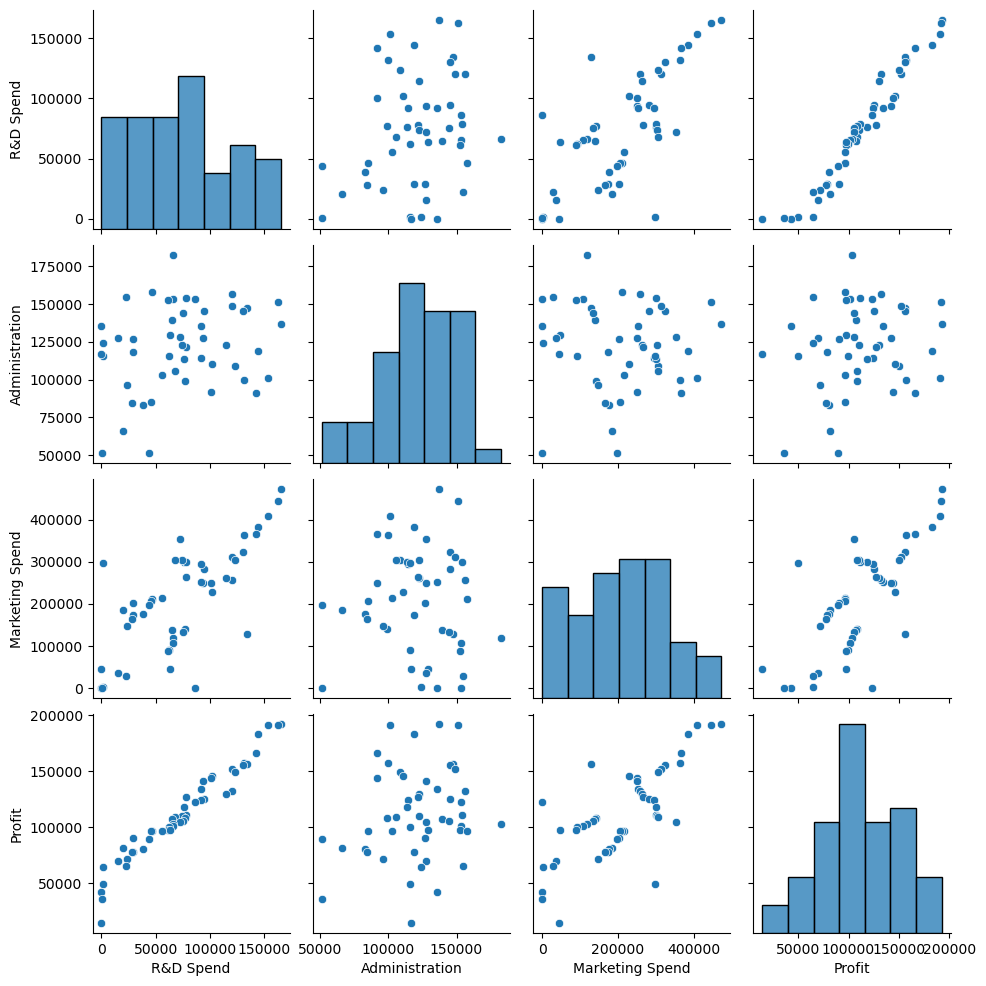

In [6]:
sns.pairplot(startup)

In [7]:
#startup_trans = startup[['R&D Spend','Administration','Marketing Spend','Profit']].transform(func = 'sqrt')

In [8]:
#print(startup_trans)

# Preparing models
# Model

In [9]:
# Renaming the columns
startup1 = startup.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
startup1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
model = smf.ols('Profit ~ RD_Spend + Administration + Marketing_Spend',data=startup1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        21:04:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Coefficients
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [13]:
# R_Sqare value
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
# Caluclating VIF for checking multiconiarity in between columns

In [15]:
#rsq_model = smf.ols('Profit ~ RD_Spend + Administration + Marketing_Spend',data=startup1).fit().rsquared
#vif_model = 1/(1-rsq_model)

rsq_RD = smf.ols('RD_Spend ~ Administration+Marketing_Spend',data=startup1).fit().rsquared
rsq_RD
vif_RD = 1/(1-rsq_RD)

rsq_adm = smf.ols('Administration ~ RD_Spend+Marketing_Spend',data=startup1).fit().rsquared
rsq_adm
vif_adm = 1/(1-rsq_adm)

rsq_mark = smf.ols('Marketing_Spend ~ RD_Spend+Administration ',data=startup1).fit().rsquared
rsq_mark
vif_mark = 1/(1-rsq_mark)

# creating a dataframe for Vif
di = {'variable':['RD','adm','mark'],'R_Sqr_val':[rsq_RD,rsq_adm,rsq_mark], 'VIF':[vif_RD,rsq_adm,vif_mark]}
VIF_frame = pd.DataFrame(di)
VIF_frame

,variable,R_Sqr_val,VIF
0,RD,0.594962,2.468903
1,adm,0.149002,0.149002
2,mark,0.570220,2.326773


In [16]:
# In this case modle good, because the Vif score is in between 0 to 5.
# There is no multicolliniarity in between x features

# Applying Tansformations, 'Log_transformation' and 'Square_Root_Transformation'

In [17]:
startup1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
startup2 = startup1.drop(['State'],axis=1)
startup2.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [19]:
import matplotlib.pyplot as plt
import numpy as np

(array([[16., 19., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8., 28., 14.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 8.,  2.,  6.,  5.,  6.,  7.,  9.,  3.,  2.,  2.],
        [ 3., 11., 23., 10.,  3.,  0.,  0.,  0.,  0.,  0.]]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <a list of 4 BarContainer objects>)

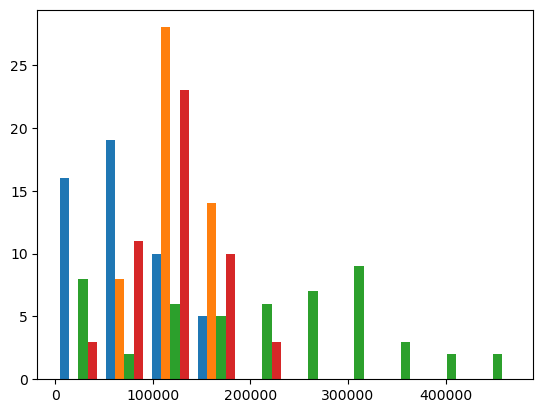

In [20]:
plt.hist(startup2)

# Log_Transformation

In [21]:
log_trns = np.log(startup2)

C:\Users\Aruna\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [22]:
log_trns.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,12.015815,11.826990,13.064277,12.166613
1,11.999034,11.927533,13.003351,12.164167
2,11.941075,11.524316,12.918862,12.160292
3,11.880151,11.684117,12.856311,12.116706
4,11.864338,11.422911,12.810849,12.020875


Ater applying log_transformation to the dataset, some values are converted into '-int' value, because of this values we doesn't get linearity in data

# Square Root Transformation

In [23]:
sqr_trns = startup2.transform(func='sqrt')
sqr_trns.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,406.631529,369.997027,686.865416,438.476715
1,403.234051,389.072731,666.257105,437.940704
2,391.716109,318.033882,638.697534,437.093114
3,379.963696,344.487808,619.031195,427.670422
4,376.971272,302.310718,605.118517,407.661551


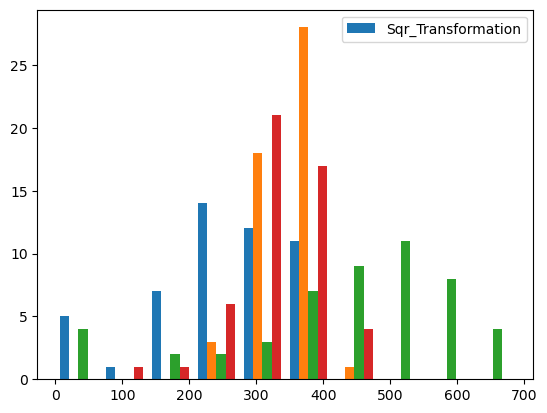

In [24]:
plt.hist(sqr_trns, label='Sqr_Transformation')
plt.legend()
plt.show()

In [25]:
# Sqr_Transformation model is fitting with OLS method

sqr_trans_model = smf.ols('Profit ~ RD_Spend + Administration + Marketing_Spend',data=sqr_trns).fit()
sqr_trans_model.summary()

#rsq_RD = smf.ols('RD_Spend ~ Administration+Marketing_Spend',data=sqr_trns).fit().rsquared
#vif_RD = 1/(1-rsq_RD)

#rsq_adm = smf.ols('Administration ~ RD_Spend+Marketing_Spend',data=sqr_trns).fit().rsquared
#vif_adm = 1/(1-rsq_adm)

#rsq_mark = smf.ols('Marketing_Spend ~ RD_Spend+Administration ',data=sqr_trns).fit().rsquared
#vif_mark = 1/(1-rsq_mark)

# creating a dataframe for Vif
#di = {'variable':['model','RD','adm','mark'], 'VIF':[vif_model,vif_RD,rsq_adm,vif_mark]}
#VIF_frame = pd.DataFrame(di)
#VIF_frame

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.22e-26
Time:                        21:04:41   Log-Likelihood:                -212.39
No. Observations:                  50   AIC:                             432.8
Df Residuals:                      46   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         188.0384     22.340      8.417      0.000     143.070     233.007
RD_Spend            0.5775      0.035     16.293      0.000       0.506       0.649
Administration     -0.0306      0.064     -0.480      0.634      -0.159       0.098
Marketing_Spend     0.0149      0.021      0.711      0.481      -0.027       0.057
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               26.638
Skew:                           0.133   Prob(JB):                     1.64e-06
Kurtosis:                       6.566   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Coefficients of sqr_trans_model
sqr_trans_model.params

Intercept          188.038398
RD_Spend             0.577516
Administration      -0.030605
Marketing_Spend      0.014869
dtype: float64

In [27]:
#t and p-Values
print(sqr_trans_model.tvalues, '\n', sqr_trans_model.pvalues)

Intercept           8.417042
RD_Spend           16.293223
Administration     -0.479711
Marketing_Spend     0.711064
dtype: float64 
 Intercept          7.234603e-11
RD_Spend           9.913620e-21
Administration     6.337062e-01
Marketing_Spend    4.806350e-01
dtype: float64


In [28]:
# R_Sqare value of sqr_trans_model
(sqr_trans_model.rsquared,sqr_trans_model.rsquared_adj)

(0.9305435277653866, 0.9260137578370423)

# Conclusion

1)Comparing the Both models original dataset with Transformed dataset, Both models are giving same r_square values.
2)Transformation is not required for this dataset. after applying the transformation valies are converted in to high to low for simple calculation.

Q2) Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
toyota = pd.read_csv(r"C:\Users\Aruna\Desktop\Assgnmnts-DS\Assignment-5\ToyotaCorolla.csv",encoding="utf-8",encoding_errors="replace")

In [31]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [32]:
#toyota.info()

In [33]:
toyota1 = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [34]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [35]:
toyota1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [36]:
toyota_rename = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'},axis=1)

In [37]:
toyota_rename.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [38]:
x = toyota_rename.iloc[:,1:].values
y = toyota_rename.iloc[:,0].values

# Preparing different models and making R2 table

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [41]:
print(x_train)

[[    55  68520     72 ...      5    185   1115]
 [    78  47400     86 ...      5     69   1040]
 [    30  38500     90 ...      5    210   1170]
 ...
 [    70  85864     72 ...      5    185   1135]
 [    50  39706    110 ...      5     85   1080]
 [    68 101001    110 ...      5     85   1075]]


In [42]:
print(y_train)

[11450 10500 13750 ...  8500 13500  8950]


In [43]:
# fitting model with LinearRegression
from sklearn.linear_model import LinearRegression

In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(x_train,y_train)

LinearRegression()

In [46]:
# model fitted, now predicting test data with fitted model
y_pred = regressor.predict(x_test)

In [47]:
print(y_pred)

[ 8228.45075727 10509.81753319 13200.36358239  7793.35358742
 10650.8681138   9775.96133894  6194.60235632 15891.70789652
 11289.68906492 10734.42706682  6821.4991166  11424.60398755
 11925.1482797   9919.9245523   7420.48317748 15769.10736319
 11184.52720719  7818.77507017 13116.67742919  8863.32155611
  6334.31194903  5500.93119821 11752.21776496 12679.94260511
 19045.63960657  7904.97775967 14262.60397731  5841.25618739
  9167.51717781  7693.25401084]


In [48]:
# checking accuracy
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# training accuracy
print('Train Score: ', regressor.score(x_train, y_train))

Train Score:  0.8648278353655927


In [50]:
# test accuracy
print('Test Score: ', regressor.score(x_test, y_test))

Test Score:  0.792205482116761


In [51]:
print(y_test,y_pred)

[ 7950 10950 14950  7500  9900  8900  6950 15750 11950  9930  8500 10450
 11895  9950  6450 15500 11950  6900 10950  9750  7350  8950 13750 14950
 19950  9450 11500  8500  9450  8800] [ 8228.45075727 10509.81753319 13200.36358239  7793.35358742
 10650.8681138   9775.96133894  6194.60235632 15891.70789652
 11289.68906492 10734.42706682  6821.4991166  11424.60398755
 11925.1482797   9919.9245523   7420.48317748 15769.10736319
 11184.52720719  7818.77507017 13116.67742919  8863.32155611
  6334.31194903  5500.93119821 11752.21776496 12679.94260511
 19045.63960657  7904.97775967 14262.60397731  5841.25618739
  9167.51717781  7693.25401084]


# Another model

In [52]:
toyota_new = toyota_rename

In [53]:
toyota_new.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [54]:
# Fitting OLS model

In [55]:
import statsmodels.api as sm

In [56]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight', data = toyota_new).fit()

In [57]:
model

In [58]:
print(model.tvalues, '\n', model.pvalues)  
model.summary()

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Tax           3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Tax           2.619148e-03
Weight        2.048576e-52
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:04:50   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

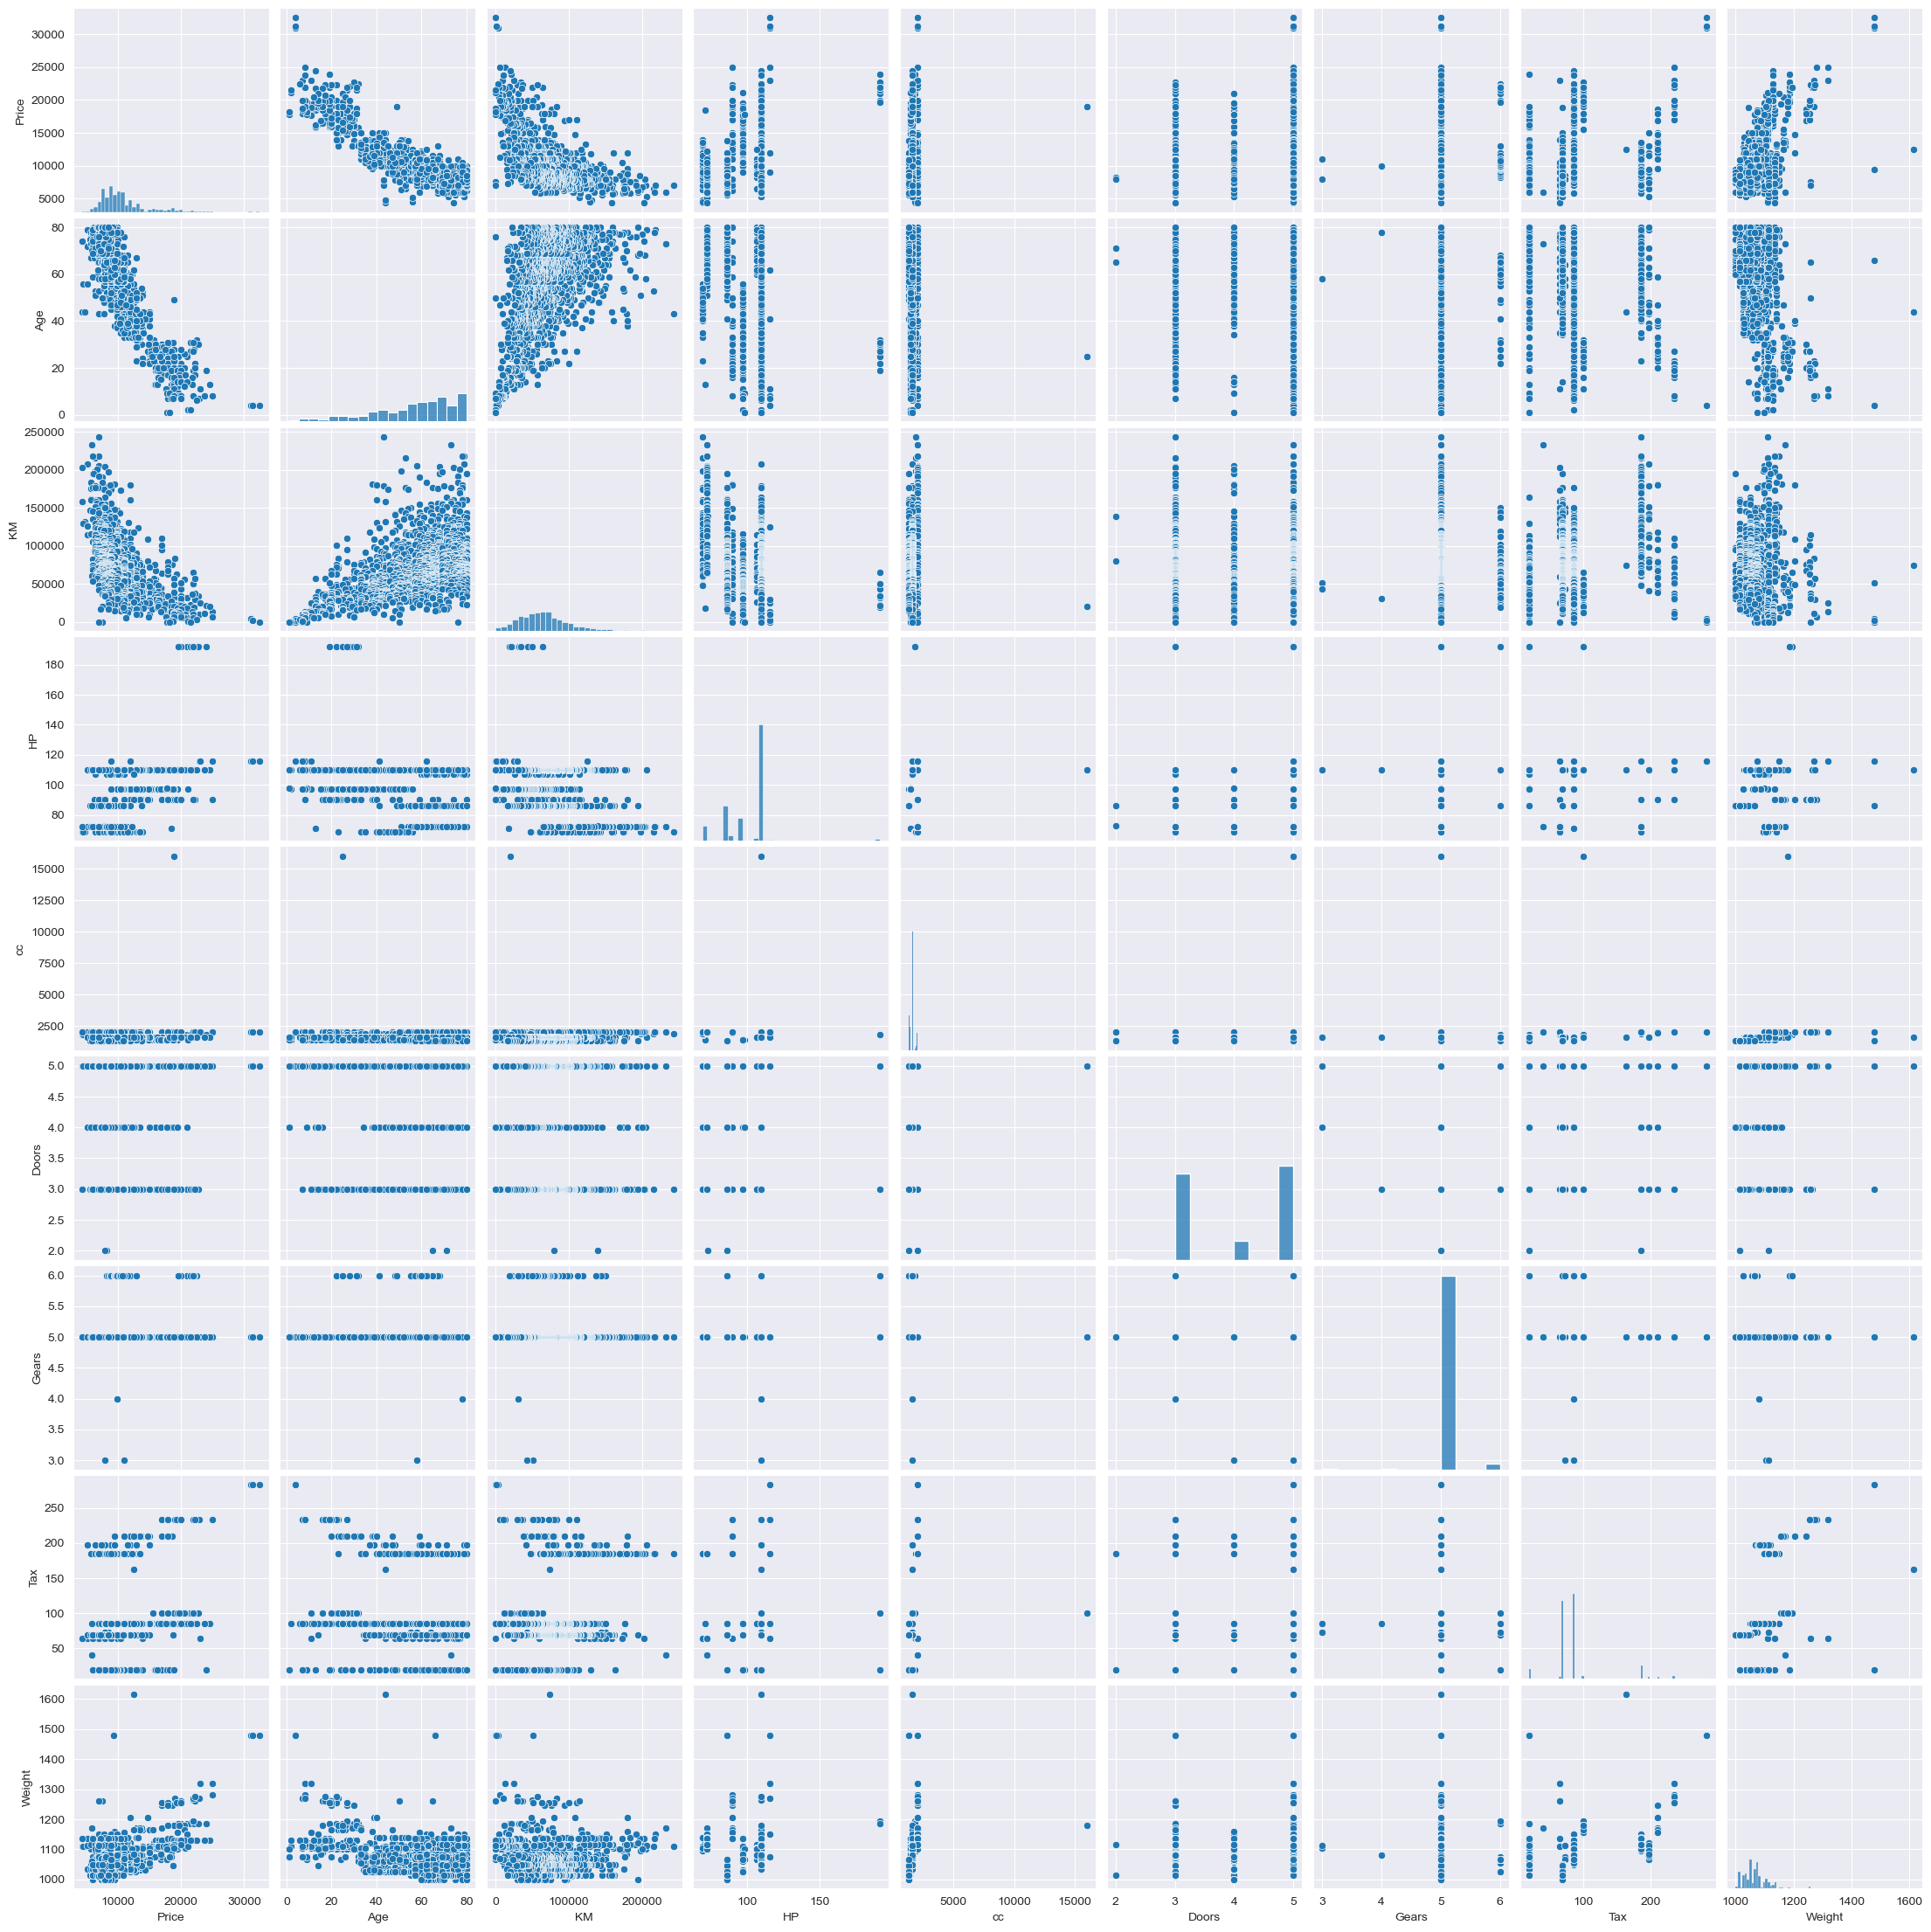

In [59]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_new)

# Calculating VIF

In [60]:
rsq_Price = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price = 1/(1-rsq_Price)

rsq_Price1 = smf.ols('Price~KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price1 = 1/(1-rsq_Price1)

rsq_Price2 = smf.ols('Price~Age+HP+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price2 = 1/(1-rsq_Price2)

rsq_Price3 = smf.ols('Price~Age+KM+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price3 = 1/(1-rsq_Price3)

rsq_Price4 = smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price4 = 1/(1-rsq_Price4)

rsq_Price5 = smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price5 = 1/(1-rsq_Price5)

rsq_Price6 = smf.ols('Price~Age+KM+HP+cc+Doors+Tax+Weight',data=toyota_new).fit().rsquared
vif_Price6 = 1/(1-rsq_Price6)

rsq_Price7 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota_new).fit().rsquared
vif_Price7 = 1/(1-rsq_Price7)

rsq_Price8 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax',data=toyota_new).fit().rsquared
vif_Price8 = 1/(1-rsq_Price8)

# Storing vif values in a data frame
df = {'Variables':['Price','Age','KM','HP','CC','Doors','Gears','Tax','Weight'],'VIF':[vif_Price,vif_Price1,vif_Price2,vif_Price3,vif_Price4,vif_Price5,vif_Price6,vif_Price7,vif_Price8]}
Vif_frame = pd.DataFrame(df)  
Vif_frame

,Variables,VIF
0,Price,7.340136
1,Age,2.917367
2,KM,6.149538
3,HP,6.743042
4,CC,7.330854
5,Doors,7.340128
6,Gears,7.293643
7,Tax,7.293689
8,Weight,6.237835


Except Age feature, all features are slightly having multicollinearity

# Residual Analysis

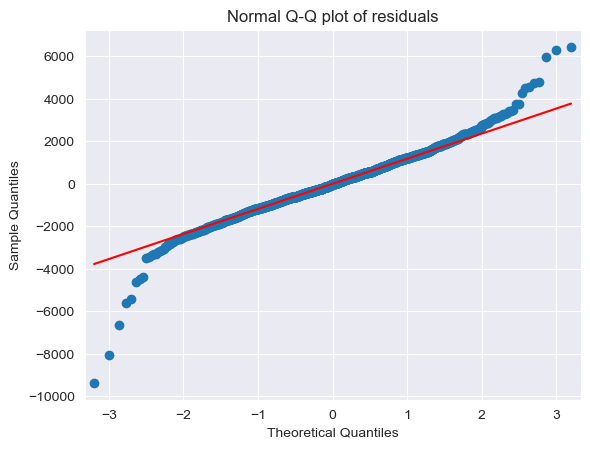

In [61]:
import statsmodels.api as sm

model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit()
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model1.resid>6000))

[array([147, 523], dtype=int64)]

# Residual plot for Homoscedasticity

In [63]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota_new).fit()

In [64]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

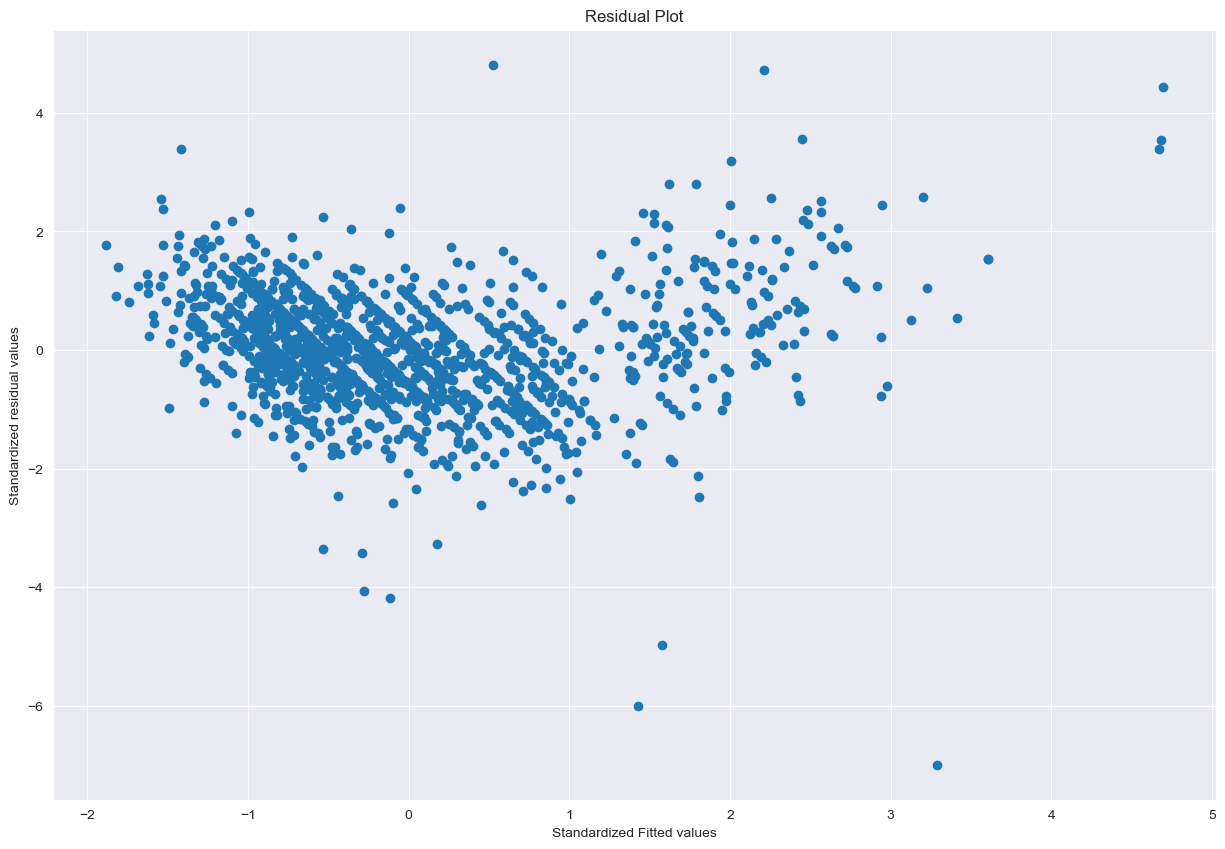

In [65]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressor

eval_env: 1


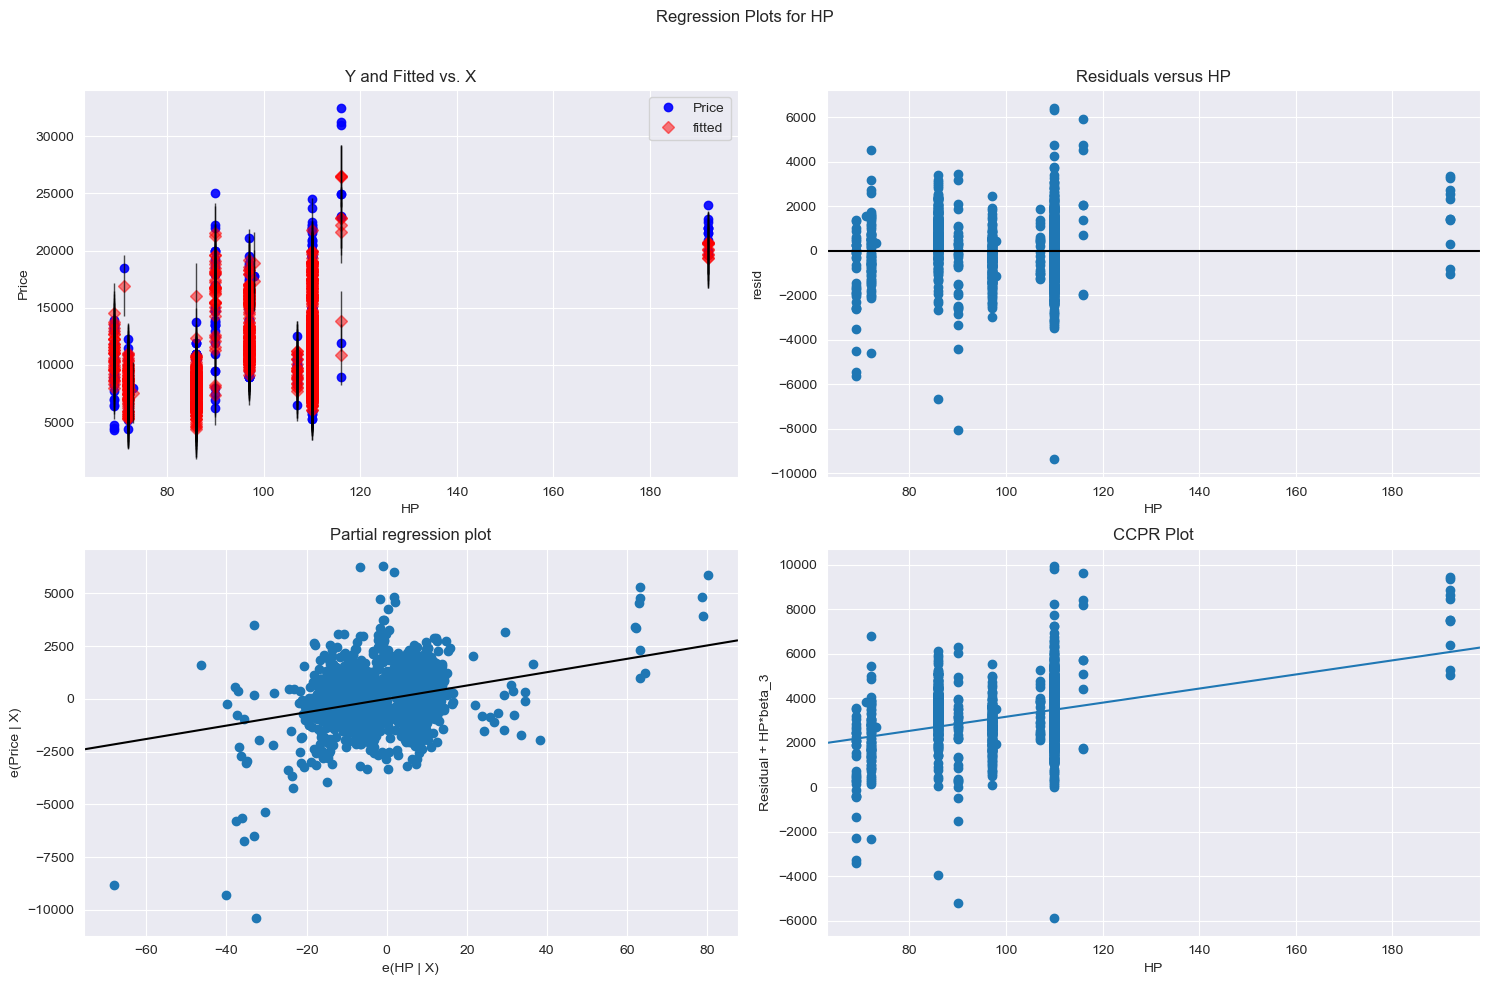

In [66]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model2, "HP", fig=fig)
plt.show()

eval_env: 1


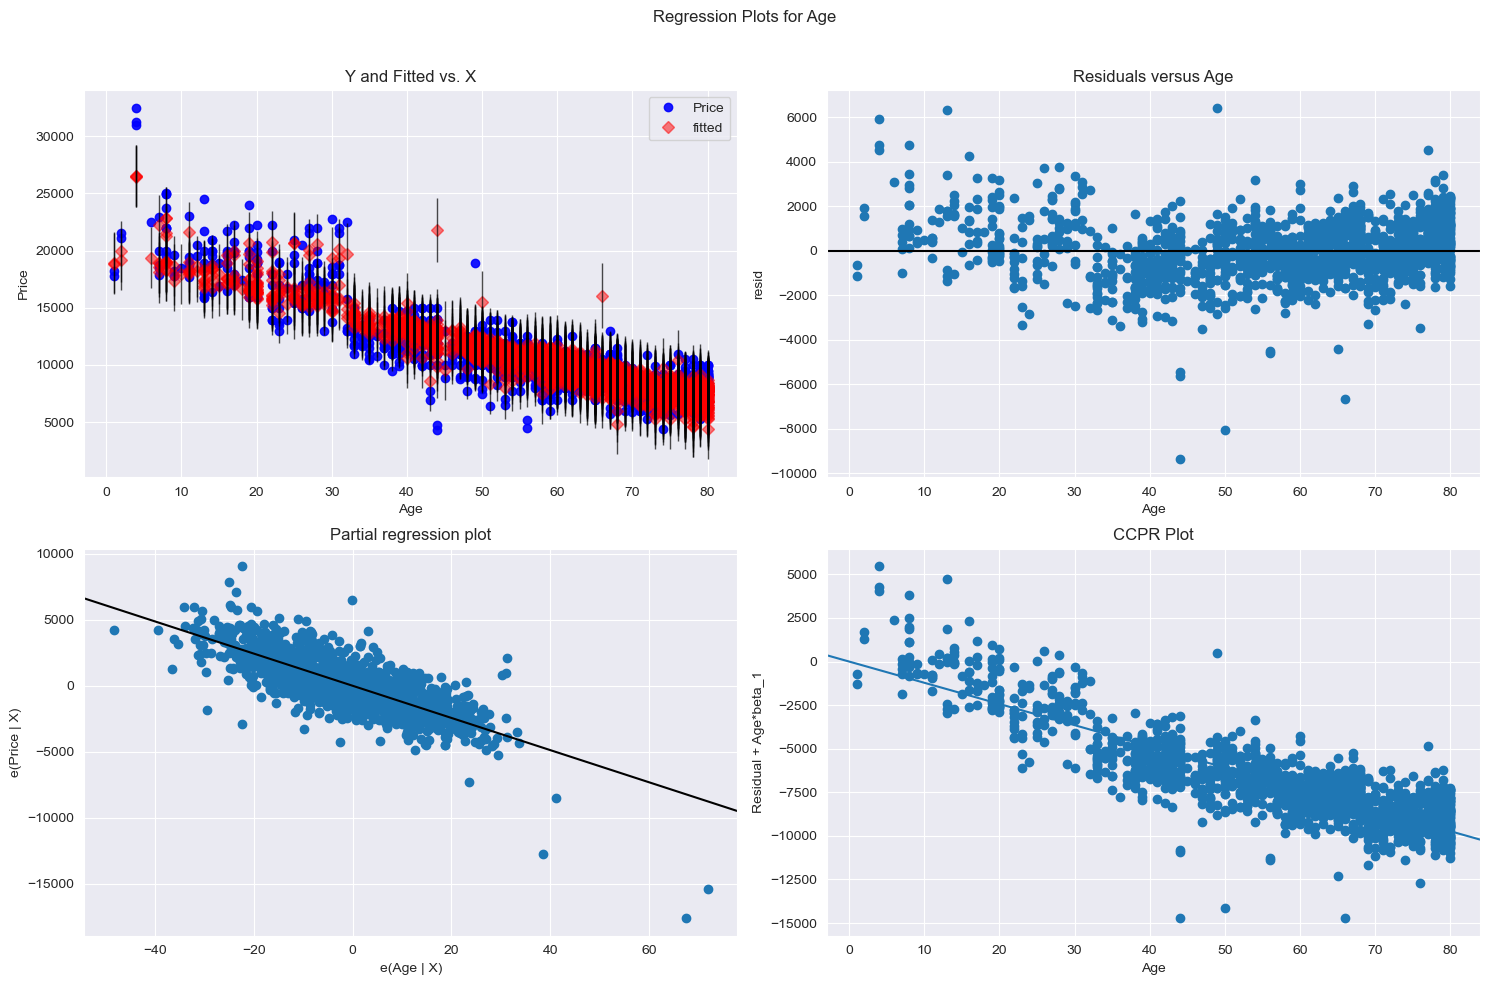

In [67]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model2, "Age", fig=fig)
plt.show()

# Model Detection Techniques

# Cook's Distance

In [68]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance


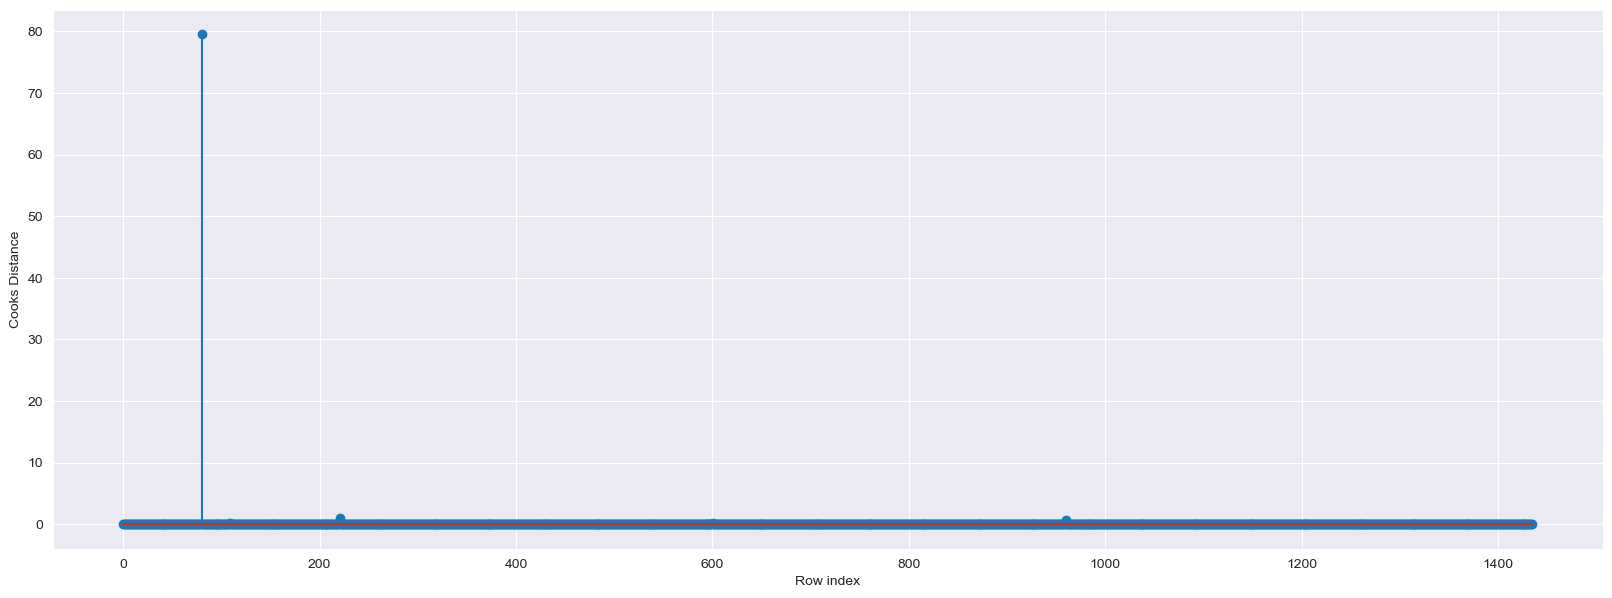

In [69]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624137341)

# Leverage cut-off

In [71]:
toyota_new.shape

(1436, 9)

In [72]:
k = toyota_new.shape[1]
n = toyota_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

# Influance Plot

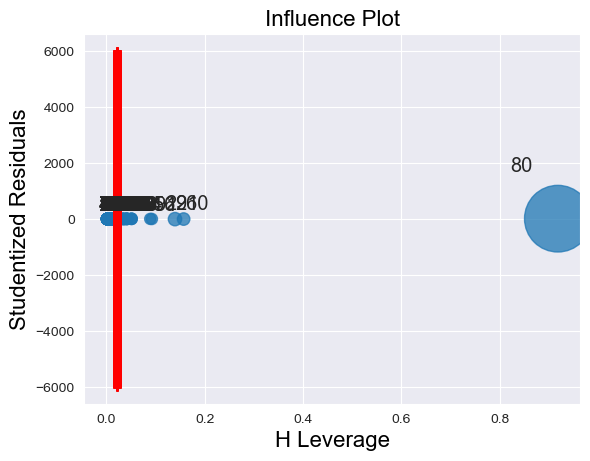

In [73]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model2,alpha=0.5)

y=[i for i in range(-6000,6000)]
x=[leverage_cutoff for i in range(12000)]
plt.plot(x,y,'r+')

plt.show()

In [74]:
toyota_new[toyota_new.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [75]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index()

In [76]:
cars.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [77]:
#Drop the original index
car = cars.drop(['index'],axis=1)

In [78]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data = car).fit()

In [79]:
(model3.rsquared,model3.aic,model3.bic)

(0.8693790488655818, 24687.28102432684, 24734.701305480583)

In [80]:
model_inf = model3.get_influence()
(c_V, _) = model_inf.cooks_distance

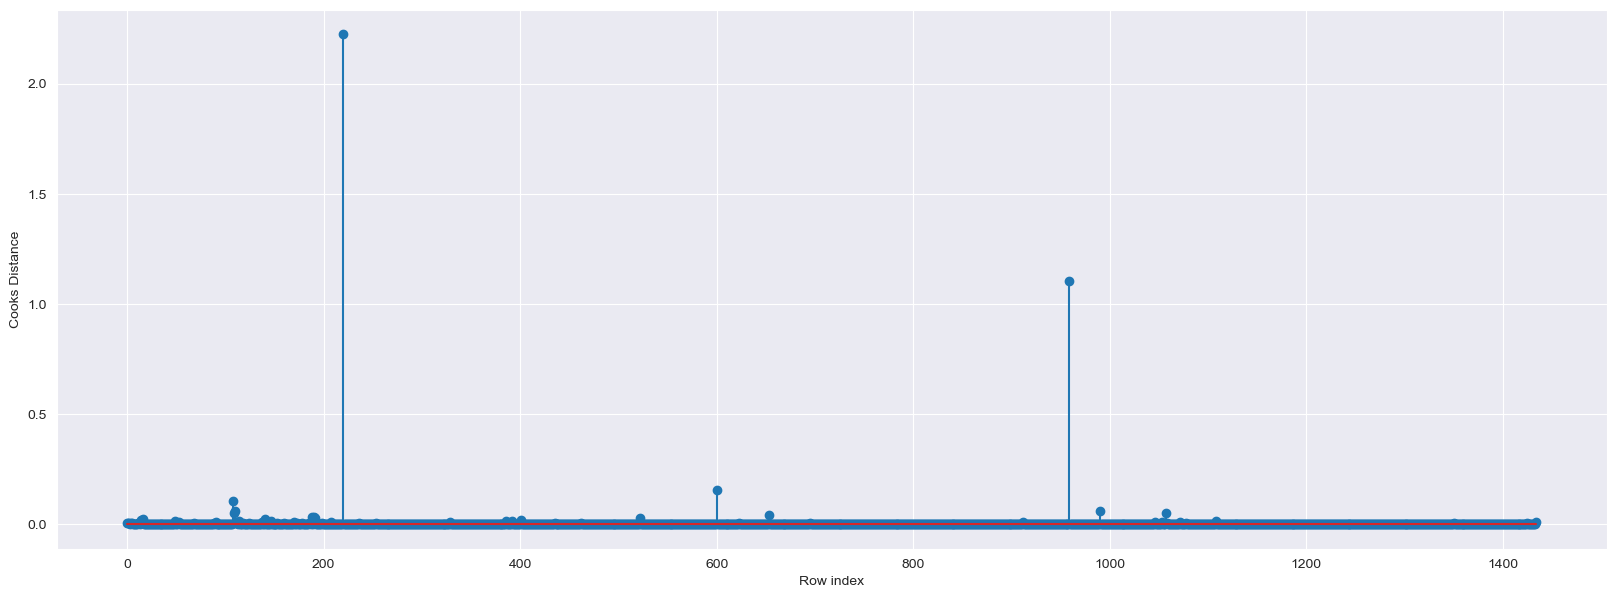

In [81]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [82]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.224461171300166)

In [83]:
#Drop 220 observations
car1=car.drop(car.index[[220]],axis=0)

In [84]:
car2 = car1.reset_index()

In [85]:
car3 = car2.drop(['index'],axis=1)

In [86]:
# Buliding model
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data = car3).fit()

In [87]:
(model4.rsquared,model4.aic,model4.bic)

(0.8778445878599779, 24574.7766156388, 24622.190622829236)

In [88]:
model_inf3 = model4.get_influence()
(c_V, _) = model_inf3.cooks_distance

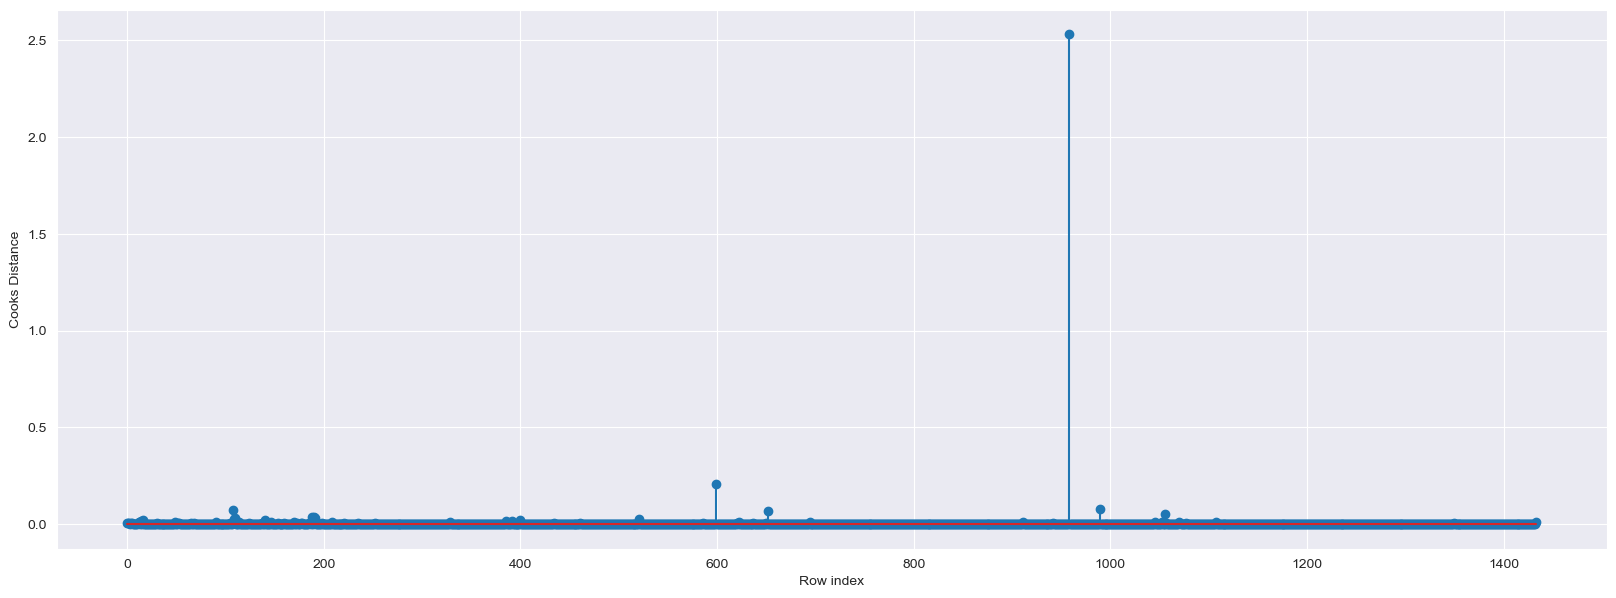

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
(np.argmax(c_V),np.max(c_V))

(958, 2.531256693023278)

In [91]:
# Dropping 958 observation
car4=car3.drop(car3.index[[958]],axis=0).reset_index()

In [92]:
final_car = car4.drop(['index'],axis=1)

In [93]:
final_car.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [94]:
# Final model building with after the process

In [95]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data = final_car).fit()

In [96]:
# Checking accuracy of the model
(final_model.rsquared,final_model.aic,final_model.bic)

(0.8851845904421739, 24469.715205158594, 24517.122934009047)

# Predicting on new data

In [97]:
#New data for prediction
new_data = pd.DataFrame({'Price':14250,'Age':30,'KM':72100,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Tax':210,'Weight':1180},index=[1])

In [98]:
final_model.predict(new_data)

1    15582.019467
dtype: float64